Math 5750/6880: Mathematics of Data Science \
Project 2

# 1. Clustering Gaussian Blobs using $k$-means

In [3]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate 5 Gaussian blobs in 10 dimensions
X, y_true = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=10,
    cluster_std=1.5,
    random_state=1)        # reproducibility
X = StandardScaler().fit_transform(X)

print(type(X),X.shape)
print(type(y_true),y_true.shape)

<class 'numpy.ndarray'> (1000, 10)
<class 'numpy.ndarray'> (1000,)


K-means inertia: 924.3159961688092


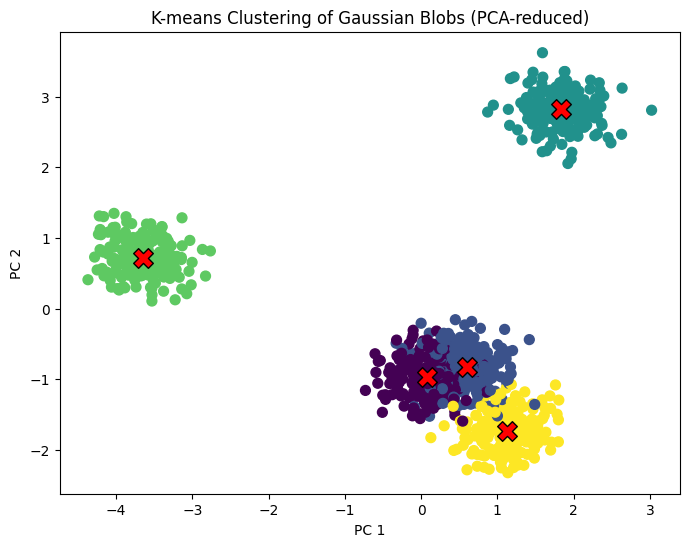

Confusion matrix after optimal label matching:
[[200   0   0   0   0]
 [  0 200   0   0   0]
 [  0   0 200   0   0]
 [  0   0   0 200   0]
 [  0   0   0   0 200]]


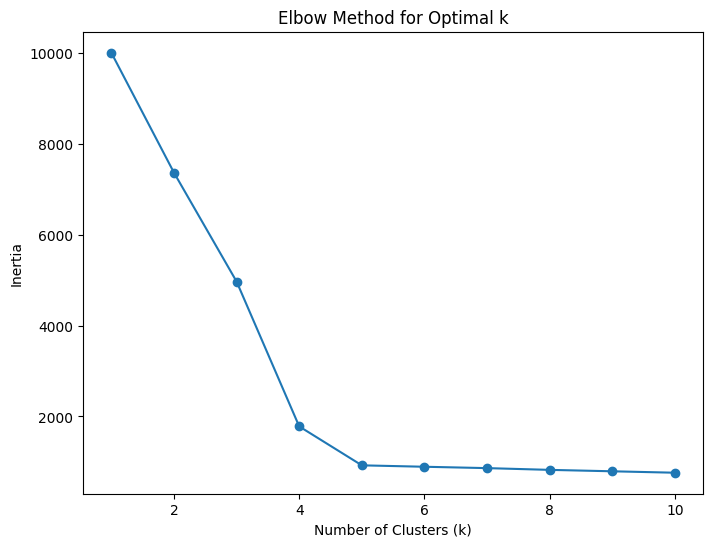

In [18]:
# your code here
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)
print("K-means inertia:", kmeans.inertia_)

# 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centers_pca = pca.transform(kmeans.cluster_centers_)

# Plot the results
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers_pca[:,0], centers_pca[:,1], c='red', s=200, marker='X', edgecolors='black')
plt.title('K-means Clustering of Gaussian Blobs (PCA-reduced)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

# Confusion matrix
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

# Compute confusion matrix
cm = confusion_matrix(y_true, y_kmeans)

# Hungarian algorithm (to match labels optimally)
row_ind, col_ind = linear_sum_assignment(-cm)
cm_aligned = cm[:, col_ind]

# Print the result
print("Confusion matrix after optimal label matching:")
print(cm_aligned)

# Elbow method analysis
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertias.append(kmeans.inertia_)

# Plot
plt.figure(figsize = (8, 6))
plt.plot(range(1,11), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# 2. Clustering Fashion-MNIST using $k$-means

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


In [ ]:
# your code here

# 3. Dimensionality reduction for Fashion-MNIST

In [ ]:
# your code here

# 4. Clustering Fashion-MNIST using spectral clustering

In [ ]:
# your code here